1. Step 1: Install and Import Required Libraries
2. Step 2: Load the Dataset
3. Step 3: Analyze and Visualize Compensation Distribution
- Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.
4. Step 4: Calculate Median Compensation for Full-Time Employees
- Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."
5. Step 5: Analyzing Compensation Range and Distribution by Country
- Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries.
- Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.

6. Step 6: Removing Outliers from the Dataset
- Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.
7. Step 7: Finding Correlations Between Key Variables
- Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. 
- Visualize these correlations with a heatmap.
8. Step 8: Scatter Plot for Correlations
- Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


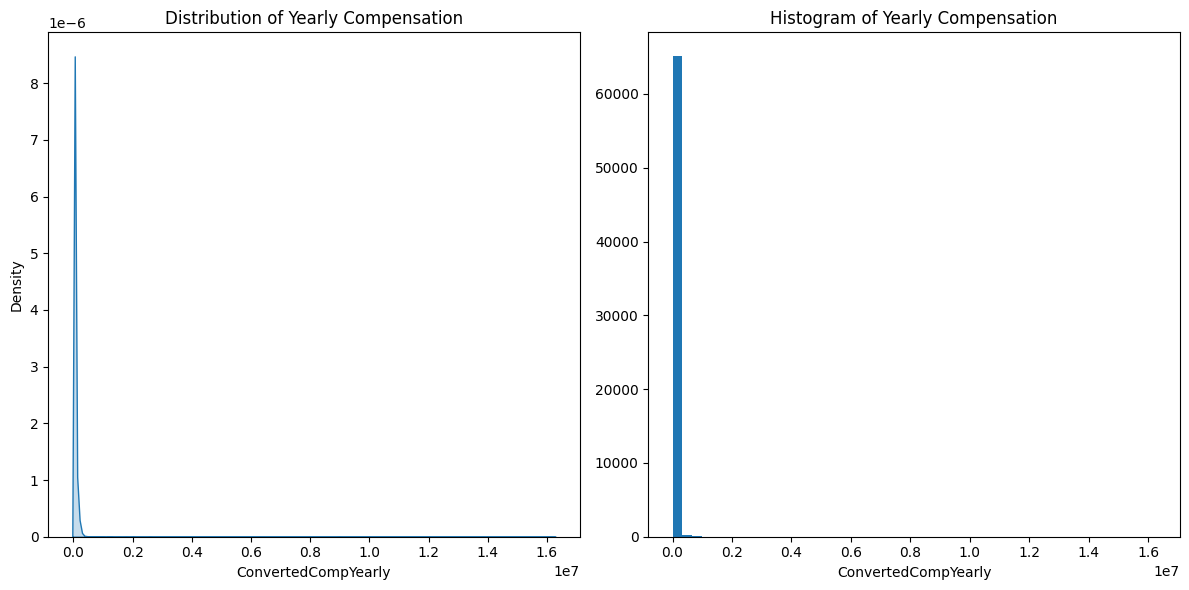

Median Compensation for Full-Time Employees: 65000.0


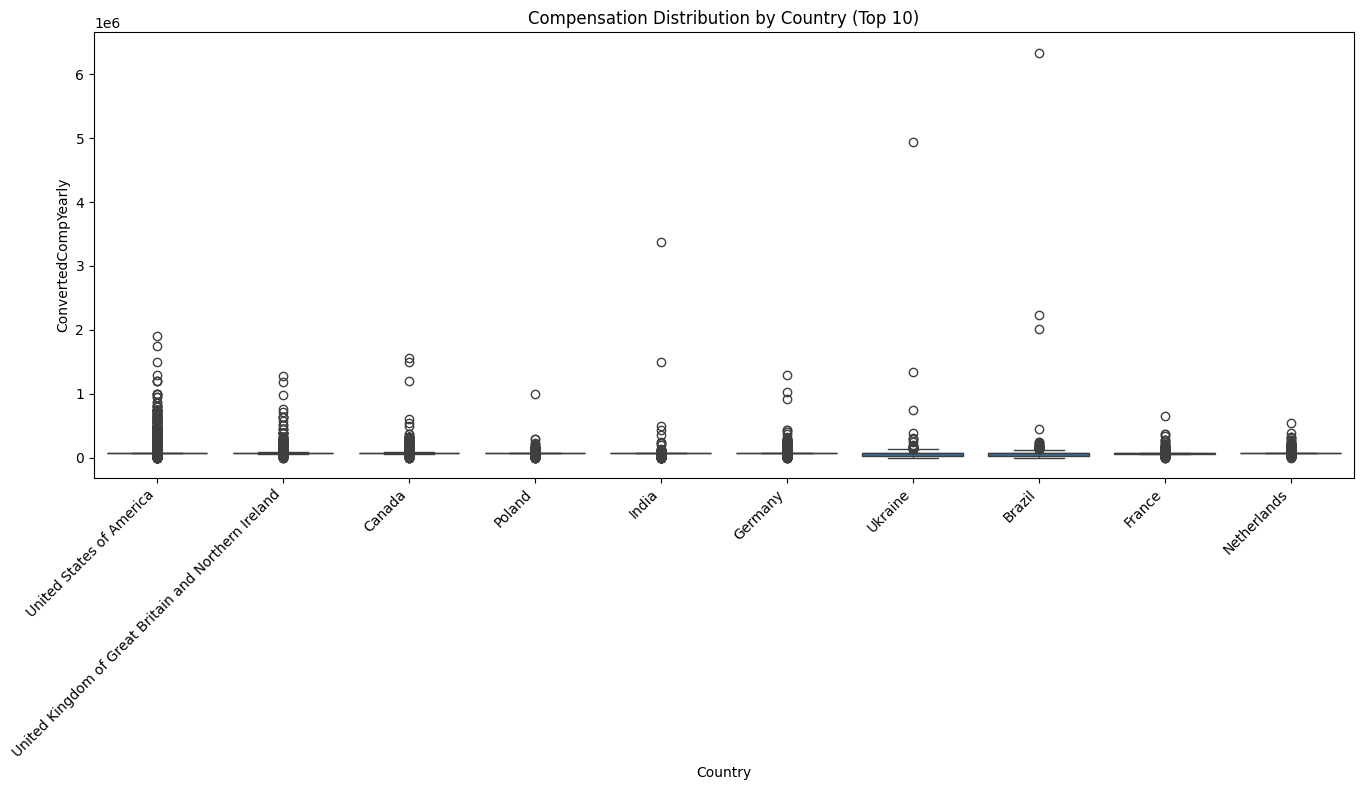

C:\Users\tdhoa\AppData\Local\Temp\ipykernel_4556\682999554.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
C:\Users\tdhoa\AppData\Local\Temp\ipykernel_4556\682999554.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df

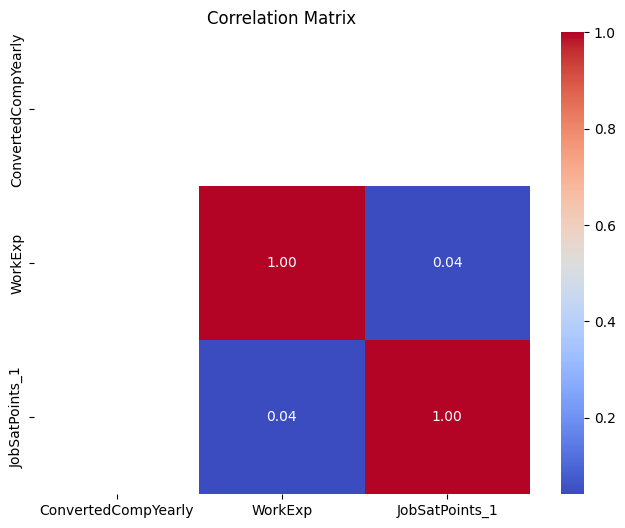

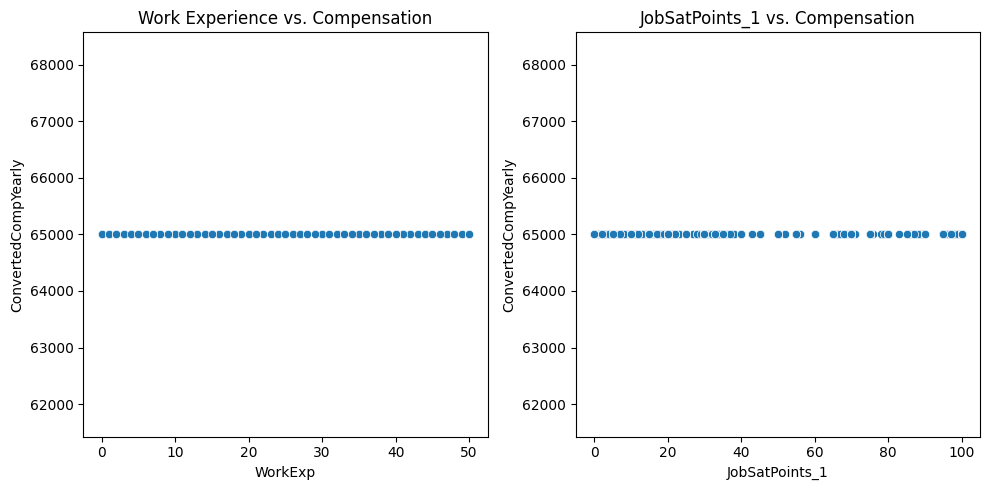

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
def load_dataset(filepath):
    df = pd.read_csv(filepath)
    return df

def handle_missing_data(df):
    """Handles missing data by imputation or removal."""
    for col in df.columns:
        if df[col].dtype == 'object':  # Impute categorical columns with mode
            df[col] = df[col].fillna(df[col].mode()[0])
        elif df[col].dtype == 'float64' or df[col].dtype == 'int64': # Impute numerical with median
            df[col] = df[col].fillna(df[col].median())

    return df

# Step 3: Analyze and Visualize Compensation Distribution
def visualize_compensation(df):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.kdeplot(df['ConvertedCompYearly'], fill=True)  # Distribution plot (KDE)
    plt.title('Distribution of Yearly Compensation')
    plt.xlabel('ConvertedCompYearly')

    plt.subplot(1, 2, 2)
    plt.hist(df['ConvertedCompYearly'], bins=50)  # Histogram
    plt.title('Histogram of Yearly Compensation')
    plt.xlabel('ConvertedCompYearly')

    plt.tight_layout()
    plt.show()



# Step 4: Calculate Median Compensation for Full-Time Employees
def median_compensation_full_time(df):
    median_comp_full_time = df[df['Employment'] == 'Employed, full-time']['ConvertedCompYearly'].median()
    print(f"Median Compensation for Full-Time Employees: {median_comp_full_time}")
    return median_comp_full_time



# Step 5: Analyzing Compensation Range and Distribution by Country
def compensation_by_country(df, top_n=10):
    top_countries = df['Country'].value_counts().nlargest(top_n).index
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Country', y='ConvertedCompYearly', data=df[df['Country'].isin(top_countries)])
    plt.title(f'Compensation Distribution by Country (Top {top_n})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()



# Step 6: Removing Outliers from the Dataset (using IQR method)
def remove_outliers(df, column='ConvertedCompYearly'):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers



# Step 7: Finding Correlations Between Key Variables
def correlation_analysis(df):
    
    # Ensure 'WorkExp' is numeric. Replace non-numeric values with NaN initially
    df['WorkExp'] = pd.to_numeric(df['WorkExp'], errors='coerce')
    
    # Now impute missing WorkExp values (if any) using the median.
    df['WorkExp'].fillna(df['WorkExp'].median(), inplace=True)


    cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']  # Replace with actual column names
    correlation_matrix = df[cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()
    return correlation_matrix




# Step 8: Scatter Plot for Correlations
def scatter_plots(df):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=df)
    plt.title('Work Experience vs. Compensation')



    plt.subplot(1, 2, 2)
    sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=df)  # JobSatPoints_1 scatter plot
    plt.title('JobSatPoints_1 vs. Compensation')


    plt.tight_layout()
    plt.show()



# Example usage:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = load_dataset(filepath)

# Handling Missing Values (Before visualization and analysis)
df = handle_missing_data(df) #From a previous response. Include the function.


visualize_compensation(df)
median_compensation_full_time(df)
compensation_by_country(df)
df_no_outliers = remove_outliers(df)
correlation_matrix = correlation_analysis(df_no_outliers)
scatter_plots(df_no_outliers)